Write a colab to demonstrate various dimensionality reduction techniques discussed in the class using

a) any tabular data set

You need to showcase

i) PCA

ii) SVD

iii) LLE

iv) t-SNE

v) ISOMAP

vi) UMAP

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import sklearn.datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


## Loading the dataset

In [37]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

#PCA

In [38]:
sc = StandardScaler()
df = sc.fit_transform(X)

In [39]:
cm = np.cov(transformed_df.T)

In [40]:
eigen_values, eigen_vectors = np.linalg.eig(cm)


In [41]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print('Eigenvalues arranged in descending order:')
for i in eigen_pairs:
    print(i[0])


Eigenvalues arranged in descending order:
2.9380850501999918
0.9201649041624865
0.14774182104494768
0.02085386217646253


In [42]:
pca = PCA()


In [43]:
pca = pca.fit(df)

In [44]:
explained_variance = pca.explained_variance_ratio_

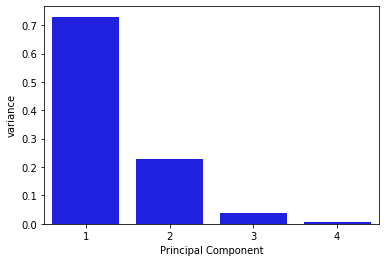

In [45]:
df1 = pd.DataFrame({'variance':pca.explained_variance_ratio_,
             'Principal Component':[i+1 for i in range(4)]})
sns.barplot(x='Principal Component',y="variance", 
           data=dataframe, color="b");

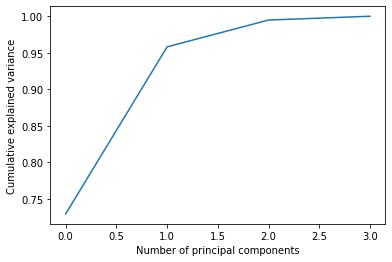

In [46]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [47]:
pca_2 = PCA(n_components =4)
pca_2 = pca_2.fit(df)
pca_2d = pca_2.transform(X)

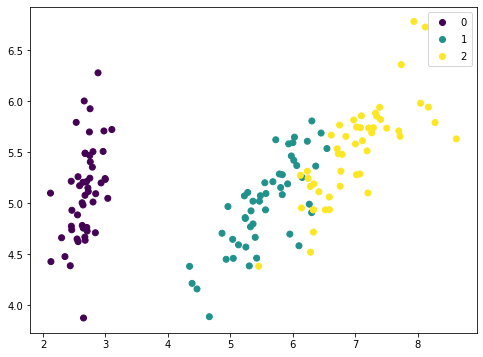

In [48]:
plt.figure(figsize=(8,6))

scatter = plt.scatter(pca_2d[:,0], pca_2d[:,1],c=y)
plt.legend(*scatter.legend_elements())

#SVD

In [49]:
u, s, v = np.linalg.svd(X, full_matrices=True)

In [50]:
u.shape


(150, 150)

In [51]:
s.shape

(4,)

In [52]:
v.shape

(4, 4)

Text(0, 0.5, 'Percent of the variance explained')

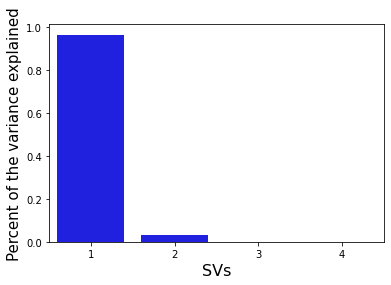

In [53]:
variance_explained = np.round(s**2/np.sum(s**2), decimals=3)
variance_explained
 
sns.barplot(x=list(range(1,len(variance_explained[:10])+1)),
            y=variance_explained[:10], color="blue")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent of the variance explained', fontsize=15)

In [54]:
col_labels= ['SV'+str(i) for i in range(1,3)]
svd_df = pd.DataFrame(u[:,0:2], index=y.tolist(), columns=col_labels)
svd_df=svd_df.reset_index()
svd_df.rename(columns={'index':'Class'}, inplace=True)
svd_df.head()

,Class,SV1,SV2
0,0,-0.061617,0.129611
1,0,-0.058071,0.111020
2,0,-0.056763,0.117966
3,0,-0.056653,0.105308
4,0,-0.061230,0.131090


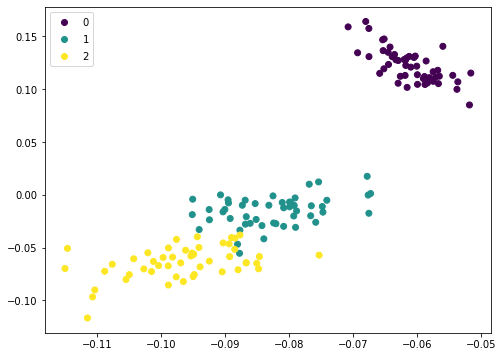

In [55]:
plt.figure(figsize=(8,6))

scatter = plt.scatter(svd_df['SV1'],svd_df['SV2'],c=svd_df['Class'])
plt.legend(*scatter.legend_elements())

#TSNE

In [56]:
import numpy as np
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.667454
[t-SNE] KL divergence after 250 iterations with early exaggeration: 94.258270
[t-SNE] KL divergence after 300 iterations: 2.070704


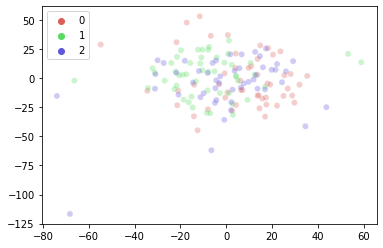

In [57]:
tsne_1 = tsne_results[:,0]
tsne_2 = tsne_results[:,1]
#plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_1, y=tsne_2,
    hue=y,
    palette=sns.color_palette("hls", 3),
    data=X,
    legend="full",
    alpha=0.3
)


#ISOMAP

In [58]:
from sklearn import manifold, datasets

In [59]:
iris = datasets.load_iris()
isomap = manifold.Isomap(n_components=2)
new_dim = isomap.fit_transform(iris.data)

In [60]:
df = pd.DataFrame(new_dim, columns=['X', 'Y'])
df['label'] = iris.target
df.head()

,X,Y,label
0,0.118155,0.381038,0
1,0.113729,0.323243,0
2,0.113922,0.325955,0
3,0.113904,0.325207,0
4,0.117613,0.372992,0


This Technique is also distrubuted the data but not good with all features

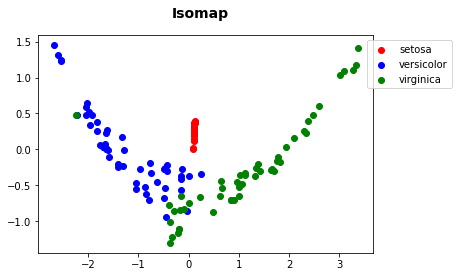

In [61]:
fig = plt.figure()
fig.suptitle('Isomap', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)

plt.scatter(df[df.label == 0].X, df[df.label == 0].Y, color='red', label=iris.target_names[0])
plt.scatter(df[df.label == 1].X, df[df.label == 1].Y, color='blue', label=iris.target_names[1])
plt.scatter(df[df.label == 2].X, df[df.label == 2].Y, color='green', label=iris.target_names[2])

plt.legend(bbox_to_anchor=(1.25, 1))

#LLE

In [62]:
from sklearn.datasets import load_digits
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=2)

In [63]:
X_transformed = embedding.fit_transform(X)

Data distribution not clearly with LLE technique

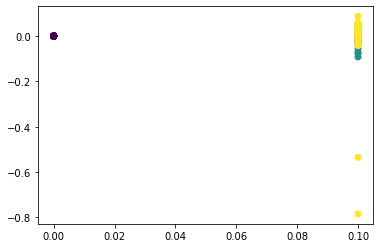

In [64]:
scatter = plt.scatter(X_transformed.T[0], X_transformed.T[1],c=y)

#UMAP

In [65]:
!pip install umap-learn

In [66]:

import umap
import time
start = time.time()
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(X)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 1.5181806087493896 seconds


In [67]:
mapper = umap.UMAP().fit(X)

In [68]:
!pip install "umap-learn[plot]"
import colorcet
import holoviews as hv
import sklearn.decomposition
import umap.plot


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


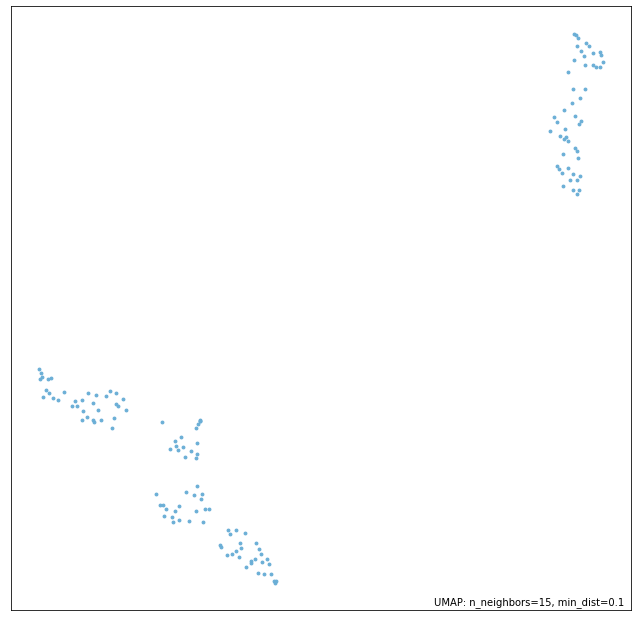

In [69]:
umap.plot.points(mapper)


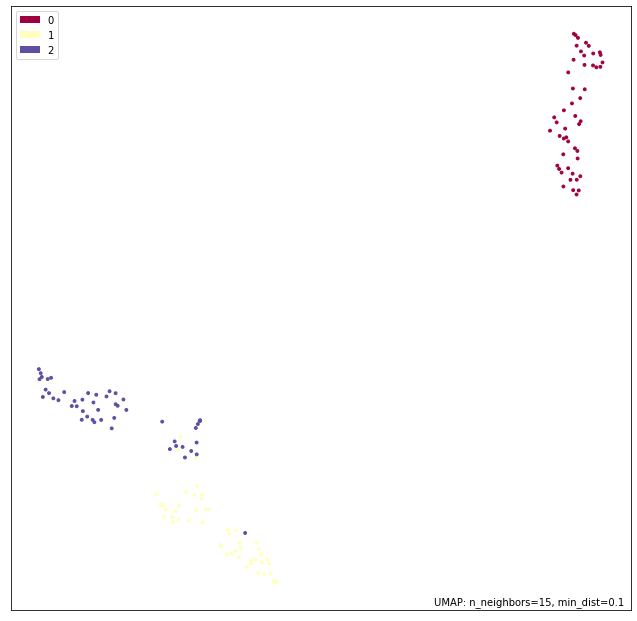

In [70]:
umap.plot.points(mapper, labels=y)

## Conclusion

PCA, SVD, ISOMAP, UMAP projects the data properly but LLE and TSNE performed well with tabular data.